# Renewable Energy Production Prediction

Predicting renewable energy production can be crucial for optimizing energy grids, managing resources, and integrating renewable sources more effectively.

Goal: Build a model to predict the amount of electricity generated by a renewable energy source (solar) based on historical data and relevant factors.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("solar_weather.csv", parse_dates=["Time"])

In [3]:
len(data)

196776

##### Sorting values by Time

In [4]:
data.sort_values(by=['Time'],inplace=True)
data.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


##### Spliting Time column into seprate year,month and day columns

In [5]:
data["Year"] = data["Time"].dt.year
# data["Month"] = data["Time"].dt.month
data["Day"] = data["Time"].dt.day
# data["saleDayOfWeek"] = data["Time"].dt.dayofweek
# data["saleDayOfYear"] = data["Time"].dt.dayofyear
data["Minute"] = data["Time"].dt.minute
print("Year   Day   Minute")
for i in range (len(data[:10])):
    print(data["Year"][i],data["Day"][i],data["Minute"][i])

Year   Day   Minute
2017 1 0
2017 1 15
2017 1 30
2017 1 45
2017 1 0
2017 1 15
2017 1 30
2017 1 45
2017 1 0
2017 1 15


In [6]:
data.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,Year,Day,Minute
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,2017,1,0
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,2017,1,15
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,2017,1,30
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,2017,1,45
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1,2017,1,0


In [7]:
del data['Time']
# data.drop('Time',inplace=True)
# data.head()

In [8]:
data.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,Year,Day,Minute
0,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,2017,1,0
1,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,2017,1,15
2,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,2017,1,30
3,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,2017,1,45
4,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1,2017,1,0


##### Droping sunlightTime data where sunlightTime = 0 because when sunlightTime = 0 solar will not going to generate electricity.

In [9]:
# data = data[data['sunlightTime'] != 0] 
# data.head()
data = data.drop(data[data['sunlightTime'] == 0].index)

In [10]:
data.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,Year,Day,Minute
29,0,0.2,2.9,1016,100,6.1,0.0,0.0,98,1,15,450,0.03,4,7,1,2017,1,15
30,0,2.7,2.9,1016,100,6.1,0.0,0.0,98,1,30,450,0.07,4,7,1,2017,1,30
31,0,6.4,2.9,1016,100,6.1,0.0,0.0,98,1,45,450,0.10,4,7,1,2017,1,45
32,5,10.6,3.5,1016,99,6.0,0.0,0.0,98,1,60,450,0.13,4,8,1,2017,1,0
33,33,6.0,3.5,1016,99,6.0,0.0,0.0,98,1,75,450,0.17,4,8,1,2017,1,15


In [11]:
len(data)

102316

### Checking For NULL values

In [12]:
data.isna().sum()

Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
Year                      0
Day                       0
Minute                    0
dtype: int64

Data is clean and having all numeric values that's why we will going to visualize data.

## Visualizing the data

Checking correlation between variables

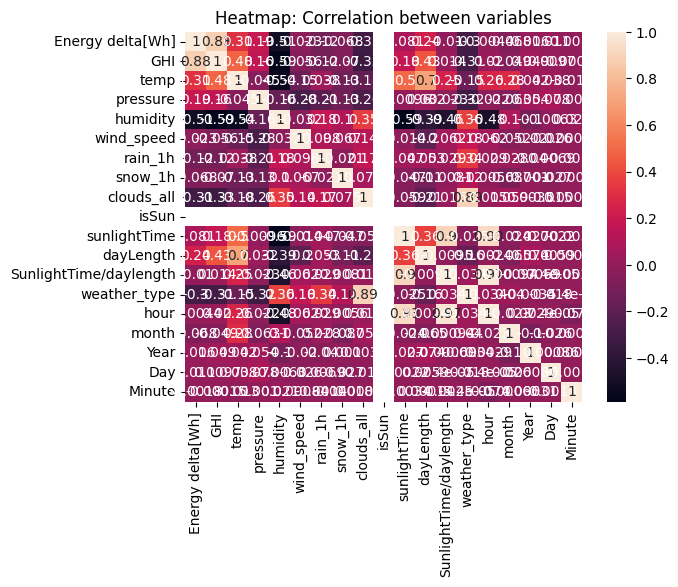

In [13]:
sns.heatmap(data.corr(), annot=True)
plt.title('Heatmap: Correlation between variables')
plt.show()

Hour vs Temprature

C:\Users\Snehal\AppData\Local\Temp\ipykernel_326296\2101858803.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['hour'], y=data['temp'], errwidth=0, palette='coolwarm')
C:\Users\Snehal\AppData\Local\Temp\ipykernel_326296\2101858803.py:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=data['hour'], y=data['temp'], errwidth=0, palette='coolwarm')


Text(0, 0.5, 'Temperature')

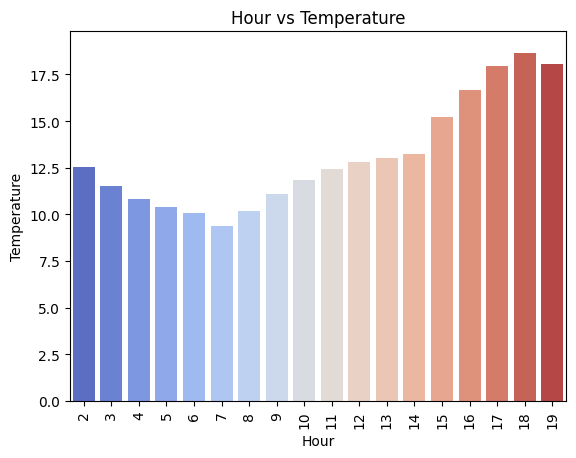

In [23]:
sns.barplot(x=data['hour'], y=data['temp'], errwidth=0, palette='coolwarm')
plt.title('Hour vs Temperature')
plt.xlabel('Hour')
plt.xticks(rotation=90)
plt.ylabel('Temperature')

The relation between temperature and hour is understandable. The temperature will be less in night and morning but it will rise to its highest in noon and after that it will start decreasing in evening.

Average Energy Production by Weather Condition

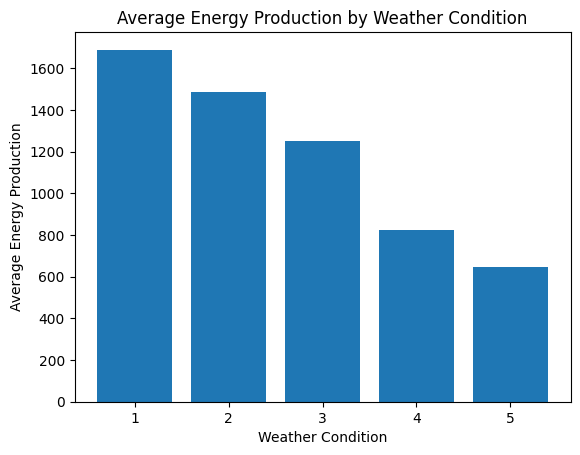

In [17]:
avg_energy = data.groupby("weather_type")["Energy delta[Wh]"].mean()


plt.bar(avg_energy.index, avg_energy.values)
plt.title("Average Energy Production by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Average Energy Production")
plt.show()

Energy based on Month

C:\Users\Snehal\AppData\Local\Temp\ipykernel_326296\3950786406.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=data['month'], y=data['Energy delta[Wh]'], errwidth=0)


Text(0, 0.5, 'Energy')

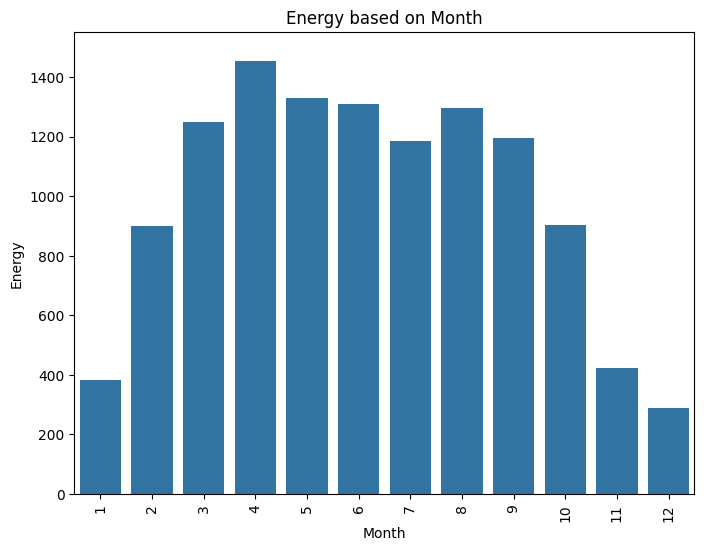

In [43]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['month'], y=data['Energy delta[Wh]'], errwidth=0)
plt.title('Energy based on Month')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Energy')

The lowest energy producing months are January, November and December.

The Highest energy producing month is June and besides that April, May, July and August are nicely energy producing months.

Solar Radiation based on Month

C:\Users\Snehal\AppData\Local\Temp\ipykernel_326296\1600097753.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=data['month'], y=data['GHI'], errwidth=0)


Text(0, 0.5, 'Solar Radiation')

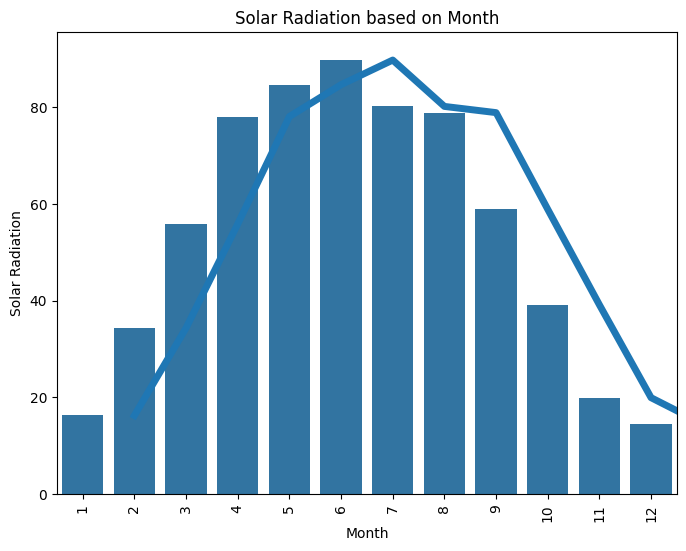

In [42]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data['month'], y=data['GHI'],linewidth=5,errorbar=None)
sns.barplot(x=data['month'], y=data['GHI'], errwidth=0)
plt.title('Solar Radiation based on Month')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Solar Radiation')

The highest solar radiation is also happening in June.

Energy vs Solar Radiation

Text(0, 0.5, 'Solar Radiation')

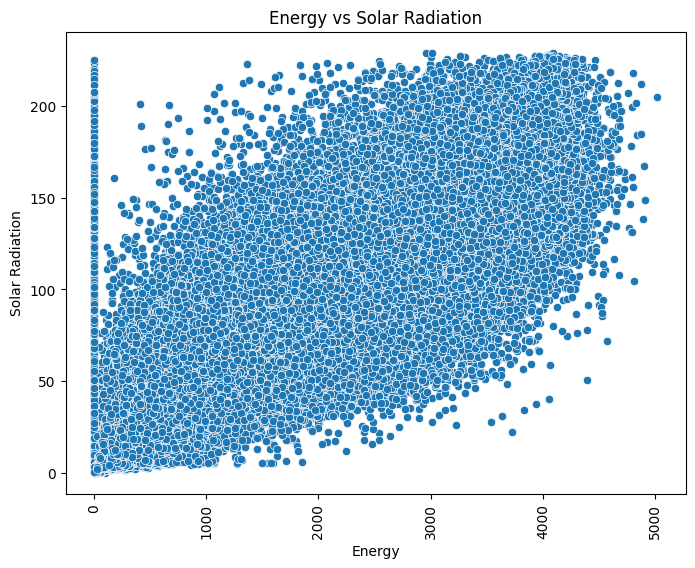

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Energy delta[Wh]'], y=data['GHI'])
plt.title('Energy vs Solar Radiation')
plt.xlabel('Energy')
plt.xticks(rotation=90)
plt.ylabel('Solar Radiation')

We can clearly see the relationship between Energy and Solar Radiation. The level of radiation goes up as the level of energy goes up and vice-versa.

Solar Radiation vs Weather Type

C:\Users\Snehal\AppData\Local\Temp\ipykernel_326296\924925552.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=data['weather_type'], y=data['GHI'], errwidth=0)


Text(0, 0.5, 'Solar Radiation')

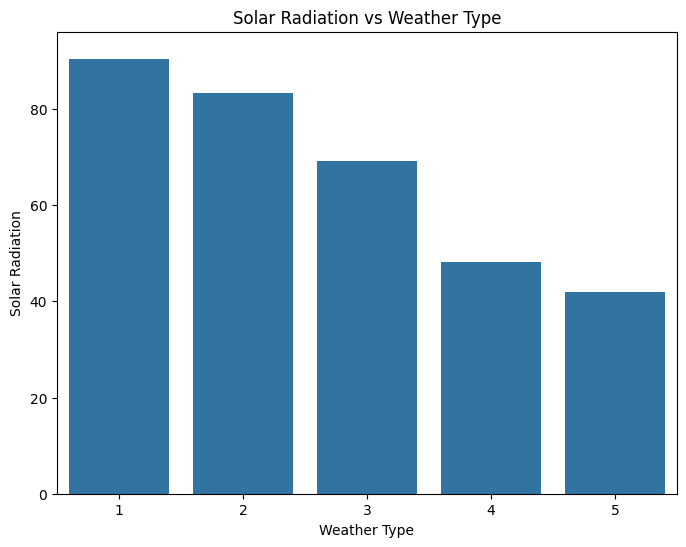

In [40]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['weather_type'], y=data['GHI'], errwidth=0)
plt.title('Solar Radiation vs Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Solar Radiation')

The solar radiation level is very high in weather type 1 and 2 whereas it is at its lowest in weather type 4 and 5.

Hour vs Energy

C:\Users\Snehal\AppData\Local\Temp\ipykernel_326296\3718161009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['hour'], y=data['Energy delta[Wh]'], errwidth=0, palette='coolwarm')
C:\Users\Snehal\AppData\Local\Temp\ipykernel_326296\3718161009.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=data['hour'], y=data['Energy delta[Wh]'], errwidth=0, palette='coolwarm')


Text(0, 0.5, 'Energy')

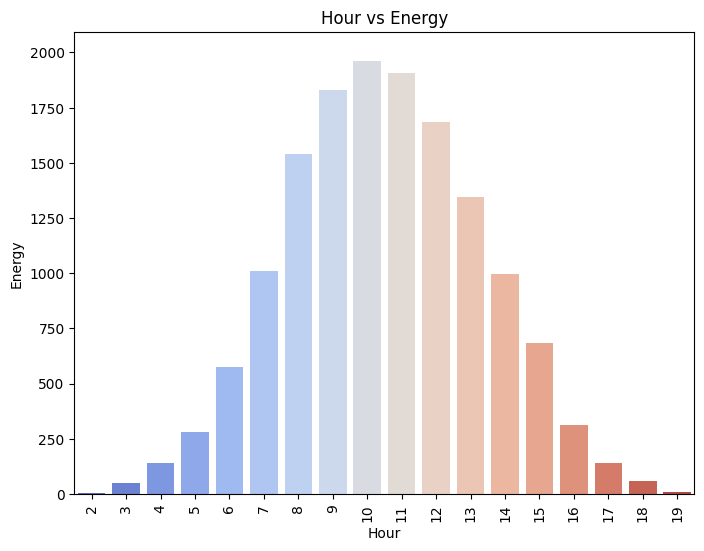

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['hour'], y=data['Energy delta[Wh]'], errwidth=0, palette='coolwarm')
plt.title('Hour vs Energy')
plt.xlabel('Hour')
plt.xticks(rotation=90)
plt.ylabel('Energy')

The energy curve is a clean bell curve. We can see as the hour increase from 0 the level of energy increases till hour 10 and from hour 11 it start decreasing all the way to the end.

### Spliting data into Train and Test 

In [24]:
from sklearn.model_selection import train_test_split

# SPlit the datainto X & y 
X = data.drop("Energy delta[Wh]", axis=1)
y = data["Energy delta[Wh]"]


# Split data into training set & Testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 30% data is considered as Testing Data 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((71621, 18), (30695, 18), (71621,), (30695,))

### Tuning DecisionTreeRegresor Model

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

# Creating RandomizedSearchCV Grid 
# grid_1 = {
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

grid_1 = {'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2', None],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
    'max_leaf_nodes': [None, 5, 10, 20]
}

# Creating RandomizedSearchCV model 
search_model_1 = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), 
                              param_distributions=grid_1, 
                              cv = 5, 
                              verbose=1, 
                              n_iter=100, 
                              n_jobs=-1 # TO access all the computer's cores 
                              )

# Fiting training dataset into RandomizedSearchCV Model 
search_model_1.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [None, 5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2,
                                                                     0.3]},
                   verbose=1)

### Finding Best Parameters

In [57]:
bestParams = search_model_1.best_params_
bestParams

{'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': 15}

### DecisionTreeRegresor Model

In [25]:
from sklearn.tree import DecisionTreeRegressor

# Creating Model 
# min_samples_split = 10, min_samples_leaf = 2, max_depth = 10

model = DecisionTreeRegressor(random_state=42, min_samples_split = 10, min_samples_leaf = 10, max_depth = 10)
# model = DecisionTreeRegressor(random_state=42, 
#                                 min_weight_fraction_leaf = 0.0,
#                                 min_samples_split= 5,
#                                 min_samples_leaf= 2,
#                                 max_leaf_nodes= None,
#                                 max_features = None,
#                                 max_depth = 15)

# Fitting data into the model
model.fit(X_train, y_train)

# accuracy 
accuracy = model.score(X_test, y_test)
print(f"{accuracy * 100:.2f}","%")

88.78 %


In [26]:
# Predicting Result Based on Neural Network Model 
energy_preds_tree = model.predict(X_test)
energy_tree = y_test


### Tuning Neural Network Model

In [16]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
# nn_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
#     'activation': ['logistic', 'tanh', 'relu'],
#     'solver': ['lbfgs', 'adam'],
#     'alpha': [0.0001, 0.001, 0.01],
#     'learning_rate': ['constant', 'adaptive'],
#     'learning_rate_init': [0.001, 0.01, 0.1],
#     'max_iter': [200, 400, 600]
# }
nn_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['logistic', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [200]  # Reduced maximum number of iterations
}


# Instantiate the grid search with the defined grid
grid_search = GridSearchCV(MLPRegressor(random_state=42), nn_grid, 
                           cv=2, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

Fitting 2 folds for each of 32 candidates, totalling 64 fits


d:\ICT 2021-25\SEM 6\PM\Solar-Energy-Prediction\EnergyENV\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\ICT 2021-25\SEM 6\PM\Solar-Energy-Prediction\EnergyENV\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\ICT 2021-25\SEM 6\PM\Solar-Energy-Prediction\EnergyENV\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\ICT 2021-25\SEM 6\PM\Solar-Energy-Prediction\EnergyENV\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

GridSearchCV(cv=2, estimator=MLPRegressor(random_state=42),
             param_grid={'activation': ['logistic', 'relu'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50,), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.01], 'max_iter': [200],
                         'solver': ['adam']},
             verbose=1)

### Finding Best Parameters

In [18]:
# Get the best parameters
best_params_nn = grid_search.best_params_
best_params_nn

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'solver': 'adam'}

### The Neural Network Model

In [27]:
from sklearn.neural_network import MLPRegressor
#'activation': 'relu',
#'alpha': 0.0001,
# 'hidden_layer_sizes': (100,),
 #'learning_rate': 'constant',
 #'learning_rate_init': 0.001,
 #'max_iter': 200,
 #'solver': 'adam'

# Creating neural network model 
neural_model = MLPRegressor(random_state=42, activation = 'relu',
 alpha = 0.001,
 hidden_layer_sizes = (100,),
 learning_rate = 'constant',
 learning_rate_init= 0.001,
 max_iter = 200,
 solver= 'adam')

# Fit data into the model 
neural_model.fit(X_train, y_train)

# Accuracy 
neural_accuracy = neural_model.score(X_test, y_test)
print(f"{neural_accuracy * 100:.2f}","%")

88.44 %


In [28]:
# Predicting Result Based on Neural Network Model 
energy_preds_neural = neural_model.predict(X_test)
# energy = y_test

In [33]:
X_test.head()

,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,Year,Day,Minute
192895,15.3,20.8,1017,83,4.7,0.00,0.0,54,1,300,975,0.31,3,7,7,2022,22,45
164082,0.9,13.8,1015,98,2.8,0.00,0.0,90,1,15,780,0.02,4,4,9,2021,12,30
193705,7.0,21.0,1017,55,3.6,0.00,0.0,98,1,915,945,0.97,4,18,7,2022,30,15
87993,68.9,22.6,1009,63,2.1,0.37,0.0,97,1,705,1005,0.70,5,14,7,2019,12,15
100081,32.0,7.7,1009,90,7.2,0.00,0.0,100,1,360,510,0.71,4,12,11,2019,15,15


### Energy Predict by Decision Tree

C:\Users\Snehal\AppData\Local\Temp\ipykernel_326296\2424667726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X_test['hour'], y=energy_tree, errwidth=0, palette='coolwarm')
C:\Users\Snehal\AppData\Local\Temp\ipykernel_326296\2424667726.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=X_test['hour'], y=energy_tree, errwidth=0, palette='coolwarm')
C:\Users\Snehal\AppData\Local\Temp\ipykernel_326296\2424667726.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X_test['hour'], y=energy_preds_tree, errwidth=0, palette='coolwarm')
C:\Users\Snehal\AppData\Local\Temp\ipykernel_326296\2

Text(0, 0.5, 'Predicted by Decision Tree')

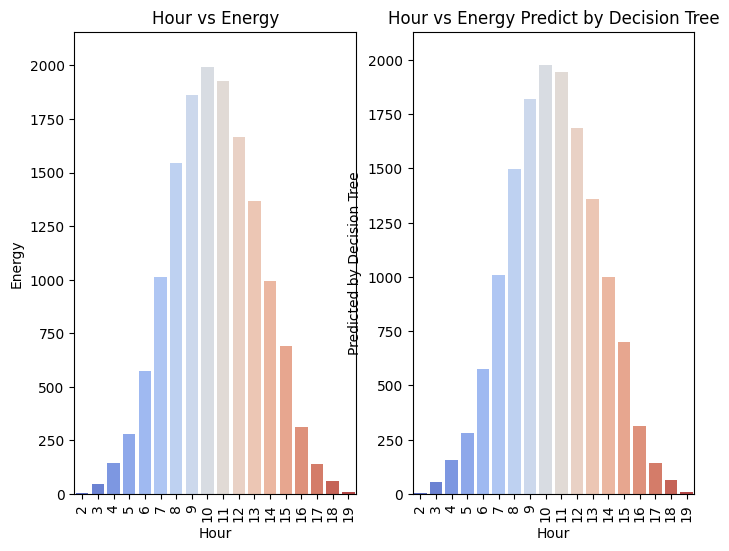

In [38]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.barplot(x=X_test['hour'], y=energy_tree, errwidth=0, palette='coolwarm')
plt.title('Hour vs Energy')
plt.xlabel('Hour')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.subplot(1,2,2)
sns.barplot(x=X_test['hour'], y=energy_preds_tree, errwidth=0, palette='coolwarm')
plt.title('Hour vs Energy Predict by Decision Tree')
plt.xlabel('Hour')
plt.xticks(rotation=90)
plt.ylabel('Predicted by Decision Tree')

### Energy Predict by Neural Network

C:\Users\Snehal\AppData\Local\Temp\ipykernel_326296\526870048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X_test['hour'], y=energy_tree, errwidth=0, palette='coolwarm')
C:\Users\Snehal\AppData\Local\Temp\ipykernel_326296\526870048.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=X_test['hour'], y=energy_tree, errwidth=0, palette='coolwarm')
C:\Users\Snehal\AppData\Local\Temp\ipykernel_326296\526870048.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X_test['hour'], y=energy_preds_neural, errwidth=0, palette='coolwarm')
C:\Users\Snehal\AppData\Local\Temp\ipykernel_326296\52

Text(0, 0.5, 'Predicted by neural network')

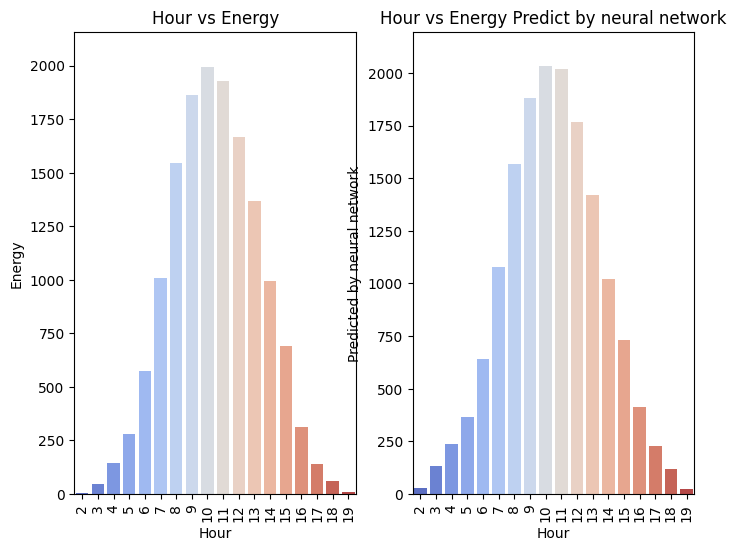

In [44]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.barplot(x=X_test['hour'], y=energy_tree, errwidth=0, palette='coolwarm')
plt.title('Hour vs Energy')
plt.xlabel('Hour')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.subplot(1,2,2)
sns.barplot(x=X_test['hour'], y=energy_preds_neural, errwidth=0, palette='coolwarm')
plt.title('Hour vs Energy Predict by neural network')
plt.xlabel('Hour')
plt.xticks(rotation=90)
plt.ylabel('Predicted by neural network')